# IMPALA Results

In [1]:
import sys
sys.path.insert(0, "../")
from  Utils.plot import plot_IMPALA_session
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import pandas as pd

## Loading metadata

In [2]:
def find_xpid_from_mapname(map_name, load_dir='../logs/torchbeast'):
    all_files = os.listdir(load_dir)
    xpid_files = [f for f in all_files if 'torchbeast' in f]
    matching_xpids = []
    for xpid in xpid_files:
        with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
            data = json.load(json_file)
            flags = data['args']
        if flags['map_name'] == map_name:
            print("Matchig xpid: ", xpid)
            print("Map name: ", flags['map_name'])
            print("Batch size: ", flags['batch_size'])
            print("Total steps: ", flags['total_steps'],'\n')
            matching_xpids.append(xpid)
    return matching_xpids

In [3]:
# search for xpids starting from the map name
game_names = {1:'MoveToBeacon',
              2:'CollectMineralShards',
              3:'DefeatRoaches',
              4:'FindAndDefeatZerglings',
              5:'DefeatZerglingsAndBanelings',
              6:'CollectMineralsAndGas',
              7:'BuildMarines'
              }
map_name = game_names[2]
matching_xpids = find_xpid_from_mapname(map_name)
matching_xpids

Matchig xpid:  torchbeast-20200727-113227
Map name:  CollectMineralShards
Batch size:  40
Total steps:  3600000 

Matchig xpid:  torchbeast-20200724-153342
Map name:  CollectMineralShards
Batch size:  22
Total steps:  6000 

Matchig xpid:  torchbeast-20200725-204918
Map name:  CollectMineralShards
Batch size:  72
Total steps:  6000 



['torchbeast-20200727-113227',
 'torchbeast-20200724-153342',
 'torchbeast-20200725-204918']

In [4]:
# define xpid of the run to load: torchbeast-yearmonthday-hourminutesecond
ymd = "20200727"
hms = "113227"
load_dir = "../logs/torchbeast"
xpid = 'torchbeast-%s-%s'%(ymd,hms)
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [5]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  CollectMineralShards
Batch size:  40
Total steps:  3600000
Learning rate:  0.0007
Entropy cost:  0.001


## Loading logs

In [6]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)

In [7]:
logs = logs[logs['mean_episode_return'].notna()]

In [8]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
0,0,1.595839e+09,0,37751.300781,0.000000,34985.847656,2766.064941,-0.614133
1,1,1.595839e+09,60,328.488678,20.850000,204.963623,124.096565,-0.571516
3,3,1.595839e+09,180,-93709.031250,19.250000,-114228.062500,20519.759766,-0.723839
5,5,1.595839e+09,300,-91407.242188,14.100000,-128399.343750,36992.574219,-0.474266
7,7,1.595839e+09,420,-73184.039062,21.650000,-95125.789062,21942.107422,-0.359841
...,...,...,...,...,...,...,...,...
40852,40852,1.595922e+09,2451120,2043.727539,94.750000,358.769836,1684.958008,-0.000254
40853,40853,1.595922e+09,2451180,2629.376709,98.666672,999.964111,1629.412842,-0.000205
40854,40854,1.595922e+09,2451240,2027.497437,93.933342,-179.060867,2206.558594,-0.000186
40855,40855,1.595922e+09,2451300,3522.805176,92.500000,113.296112,3409.509521,-0.000485


In [9]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

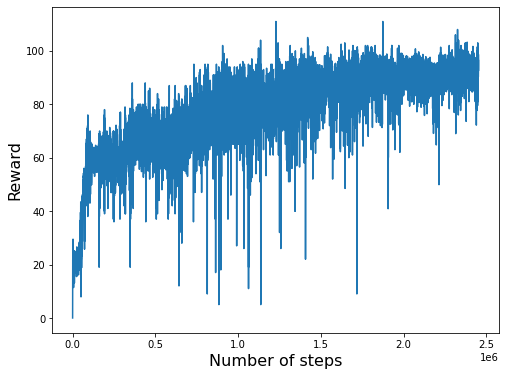

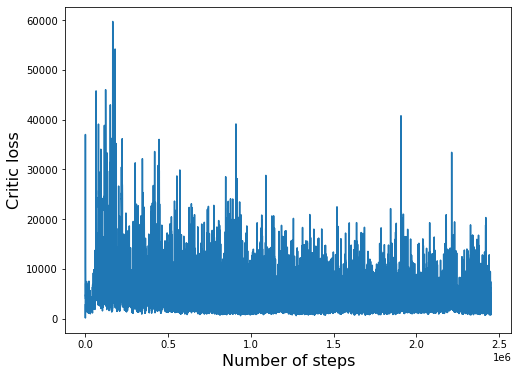

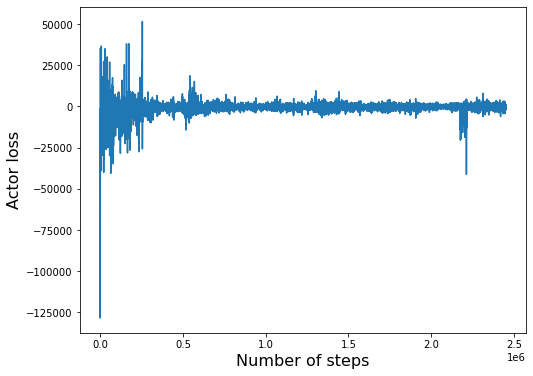

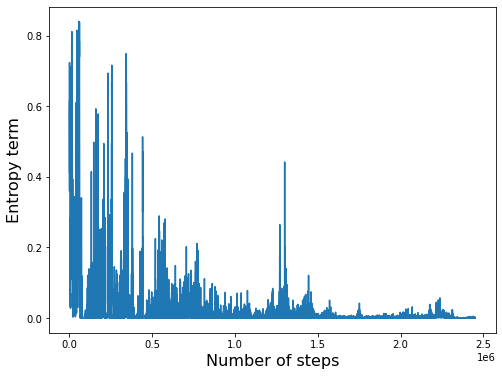

In [10]:
plot_IMPALA_session(results)

## Comments

Both Adam and RMSprop show oscillations in the actor and critic losses even after convergence to the optimal policy by the agent.

Removing gradient clipping we also get it somehow.

# MoveToBeacon

Target score: 26 (DeepMind)

In [58]:
# define xpid of the run to load: torchbeast-yearmonthday-hourminutesecond
ymd = "20200727"
hms = "113216"
load_dir = "../logs/torchbeast"
xpid = 'torchbeast-%s-%s'%(ymd,hms)
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [59]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  MoveToBeacon
Batch size:  40
Total steps:  120000
Learning rate:  0.0007
Entropy cost:  0.001


In [60]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)
logs = logs[logs['mean_episode_return'].notna()]

In [61]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
0,0,1.595839e+09,0,1499.545532,0.000000,1466.273071,33.874214,-0.601849
1,1,1.595839e+09,60,-5738.138672,0.850000,-5828.133789,90.608040,-0.612637
3,3,1.595839e+09,180,-1795.953979,0.950000,-1857.742920,62.401550,-0.612698
5,5,1.595839e+09,300,149.728806,1.100000,107.573318,42.757256,-0.601759
7,7,1.595839e+09,420,443.243835,0.750000,406.204895,37.666275,-0.627312
...,...,...,...,...,...,...,...,...
1991,1991,1.595842e+09,119460,4302.445312,22.800001,-385.087494,4687.887695,-0.355162
1993,1993,1.595842e+09,119580,3690.619385,22.700001,-756.169739,4447.192871,-0.403908
1995,1995,1.595842e+09,119700,3497.805176,23.050001,-616.551392,4114.785156,-0.428634
1997,1997,1.595842e+09,119820,3404.897705,22.900000,-629.038635,4034.390137,-0.453797


In [62]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

In [65]:
baseline_loss[-100:]

array([12058.81640625, 10743.33007812, 10445.78320312, 10260.60546875,
        9751.88867188, 10214.078125  ,  9584.6328125 ,  8671.30664062,
        9262.28613281,  8870.51757812,  8991.3515625 ,  8150.72509766,
        8417.34375   ,  8309.36328125,  8020.7578125 ,  8153.88378906,
        7719.70996094,  7762.83251953,  7595.3828125 ,  7567.94677734,
        7148.80566406,  7181.546875  ,  7003.60986328,  6918.82617188,
        6934.38427734,  6688.05712891,  6511.91308594,  6564.23046875,
        6247.83984375,  5952.18212891,  6142.81396484,  5652.67285156,
        5502.05566406,  5420.58984375,  5213.88623047,  4980.09521484,
        4817.20263672,  4562.84960938,  4270.07421875,  4409.13378906,
        4083.20581055,  3835.30273438,  3698.21826172,  3522.26660156,
        3290.51147461,  3100.16259766,  2866.78027344,  2566.62304688,
        2321.6105957 ,  2191.06152344,  1997.82202148,  1783.71838379,
        1475.18994141,  1036.63586426,   195.75476074,   596.90930176,
      

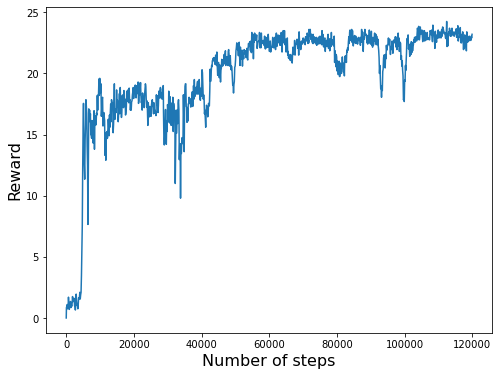

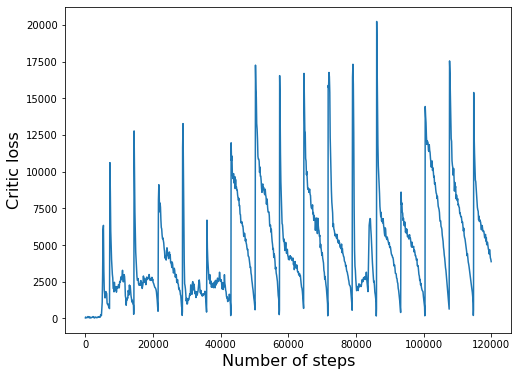

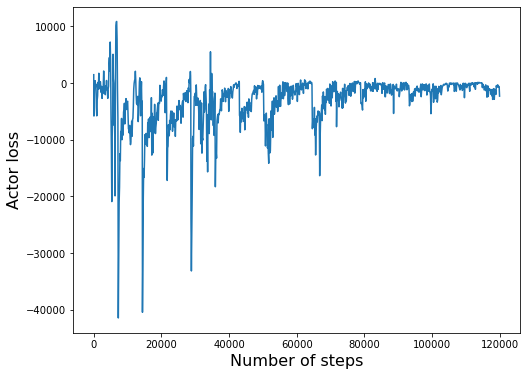

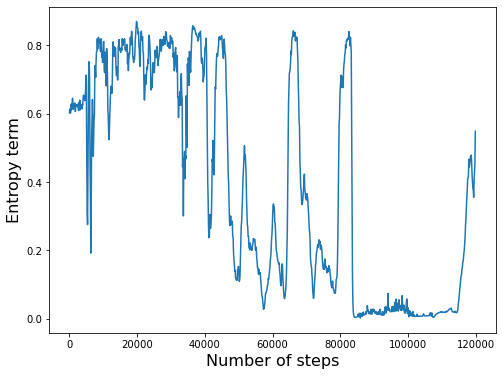

In [63]:
plot_IMPALA_session(results, moving_average=False, average_window=10)

In [43]:
print("Average asymptotic reward: %.2f"%score[-100:].mean())

Average asymptotic reward: 23.06


# CollectMineralShards

Target score: 103 (DeepMind)

In [4]:
# define xpid of the run to load: torchbeast-yearmonthday-hourminutesecond
ymd = "20200727"
hms = "113227"
load_dir = "../logs/torchbeast"
xpid = 'torchbeast-%s-%s'%(ymd,hms)
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [5]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  CollectMineralShards
Batch size:  40
Total steps:  3600000
Learning rate:  0.0007
Entropy cost:  0.001


In [6]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)
logs = logs[logs['mean_episode_return'].notna()]

In [7]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
0,0,1.595839e+09,0,37751.300781,0.0000,34985.847656,2766.064941,-0.614133
1,1,1.595839e+09,60,328.488678,20.8500,204.963623,124.096565,-0.571516
3,3,1.595839e+09,180,-93709.031250,19.2500,-114228.062500,20519.759766,-0.723839
5,5,1.595839e+09,300,-91407.242188,14.1000,-128399.343750,36992.574219,-0.474266
7,7,1.595839e+09,420,-73184.039062,21.6500,-95125.789062,21942.107422,-0.359841
...,...,...,...,...,...,...,...,...
59996,59996,1.595960e+09,3599760,678.620117,92.7500,-848.692627,1527.312744,-0.000005
59997,59997,1.595960e+09,3599820,2909.441406,94.1250,-1602.259033,4511.700684,-0.000166
59998,59998,1.595960e+09,3599880,695.686707,94.0000,-603.335266,1299.021973,-0.000013
59999,59999,1.595960e+09,3599940,2186.813721,94.8125,-579.902527,2766.716309,-0.000085


In [8]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

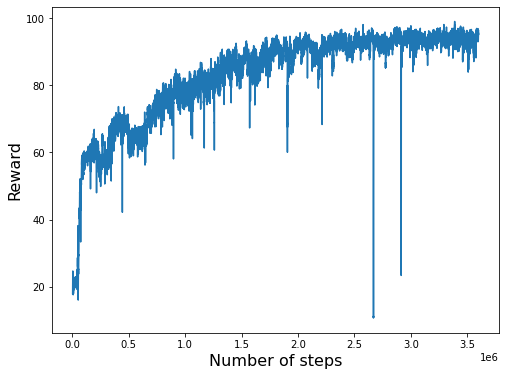

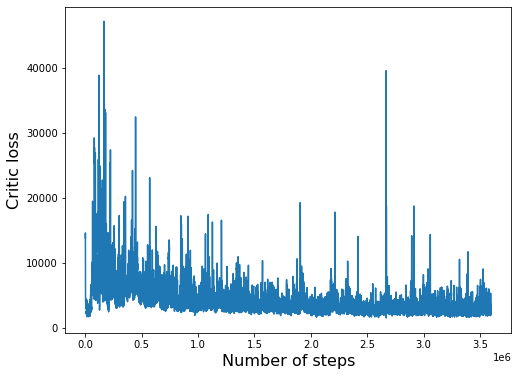

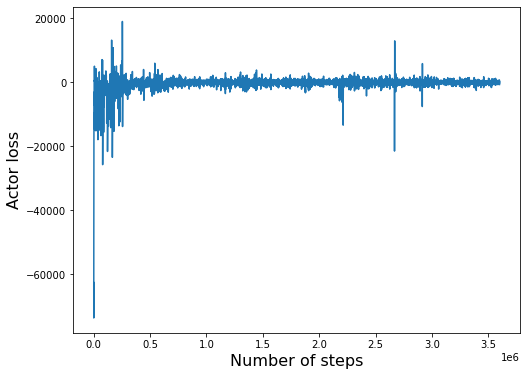

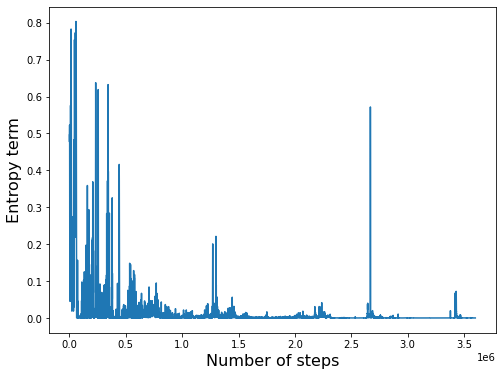

In [9]:
plot_IMPALA_session(results, moving_average=True, average_window=10)

In [10]:
print("Average asymptotic reward: %.2f"%score[-100:].mean())

Average asymptotic reward: 94.52


# FindAndDefeatZerglings

Target score: 45 (DeepMind)

In [11]:
# define xpid of the run to load: torchbeast-yearmonthday-hourminutesecond
ymd = "20200727"
hms = "113241"
load_dir = "../logs/torchbeast"
xpid = 'torchbeast-%s-%s'%(ymd,hms)
with open("%s/%s/%s"%(load_dir,xpid,"meta.json")) as json_file:
    data = json.load(json_file)
    flags = data['args']

In [12]:
# minimal info needed
print("Map name: ", flags['map_name'])
print("Batch size: ", flags['batch_size'])
print("Total steps: ", flags['total_steps'])
print("Learning rate: ", flags['learning_rate'])
print("Entropy cost: ", flags['entropy_cost'])

Map name:  FindAndDefeatZerglings
Batch size:  40
Total steps:  3600000
Learning rate:  0.0007
Entropy cost:  0.001


In [13]:
logfile = "%s/%s/logs.csv"%(load_dir,xpid)
logs = pd.read_csv(logfile)
logs = logs[logs['mean_episode_return'].notna()]

In [14]:
logs

,# _tick,_time,step,total_loss,mean_episode_return,pg_loss,baseline_loss,entropy_loss
0,0,1.595839e+09,0,14143.817383,-0.322581,13259.995117,884.416138,-0.594120
1,1,1.595839e+09,60,607.234985,4.000000,323.132355,284.700073,-0.597423
2,2,1.595839e+09,120,1432.054199,4.636364,1148.525635,284.125122,-0.596547
3,3,1.595839e+09,180,-6081.532715,10.500000,-6474.327637,393.401825,-0.606944
4,4,1.595839e+09,240,-10178.072266,7.444445,-11395.475586,1218.015869,-0.612094
...,...,...,...,...,...,...,...,...
59996,59996,1.595966e+09,3599760,3191.223389,46.500000,378.662659,2812.581543,-0.020848
59997,59997,1.595966e+09,3599820,2240.283936,38.000000,37.809776,2202.484863,-0.010623
59998,59998,1.595966e+09,3599880,3612.263672,38.833336,1102.608643,2509.676270,-0.021138
59999,59999,1.595966e+09,3599940,1483.005127,47.111111,-196.598755,1679.617432,-0.013512


In [15]:
steps = np.array(logs['step'])
score = np.array(logs['mean_episode_return'])
pg_loss = np.array(logs['pg_loss'])
baseline_loss = np.array(logs['baseline_loss'])
entropy_loss = np.array(logs['entropy_loss'])
results = dict(
    steps = steps,
    score = score, 
    pg_loss = pg_loss,
    baseline_loss = baseline_loss,
    entropy_loss = entropy_loss 
)

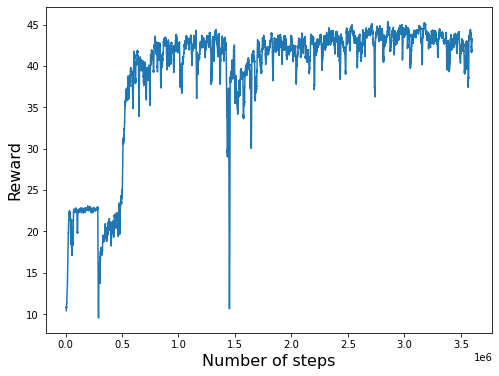

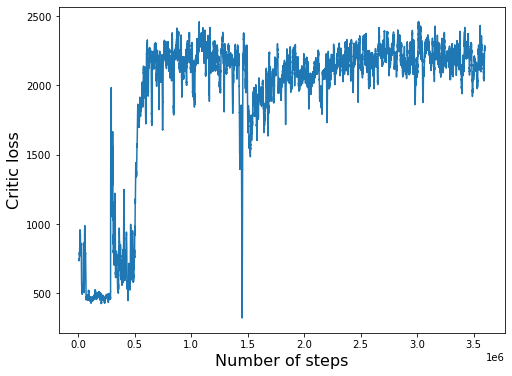

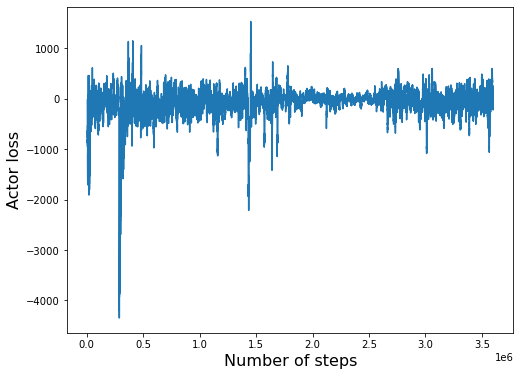

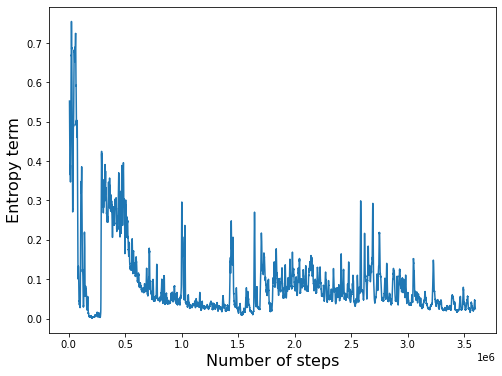

In [16]:
plot_IMPALA_session(results, moving_average=True, average_window=100)

In [17]:
print("Average asymptotic reward: %.2f"%score[-100:].mean())

Average asymptotic reward: 43.33


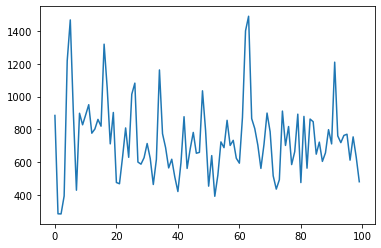

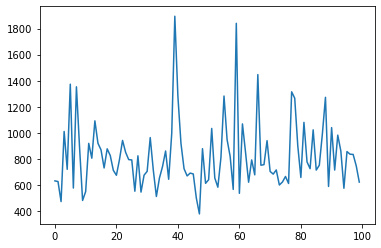

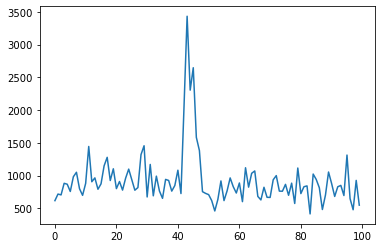

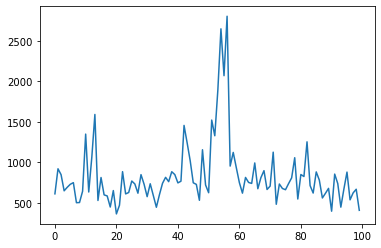

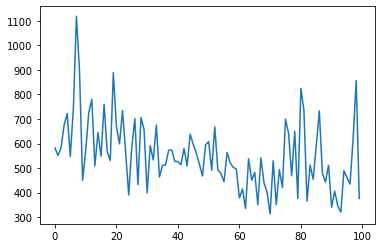

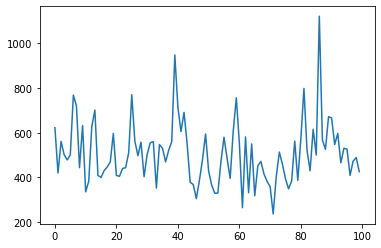

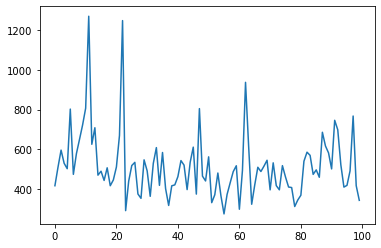

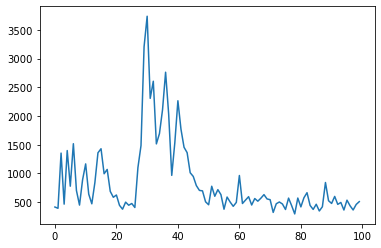

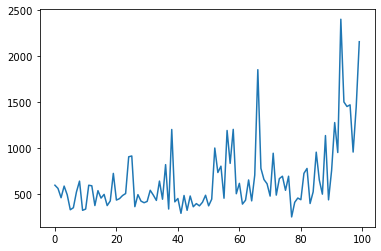

In [26]:
for n in range(1,10):
    plt.plot(baseline_loss[n*100 - 100:n*100])
    plt.show()

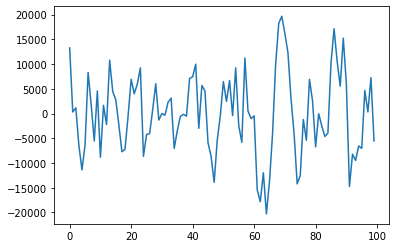

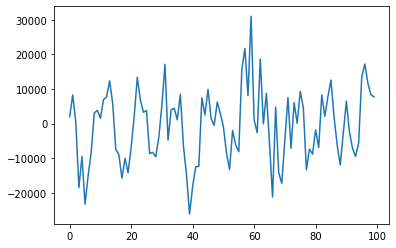

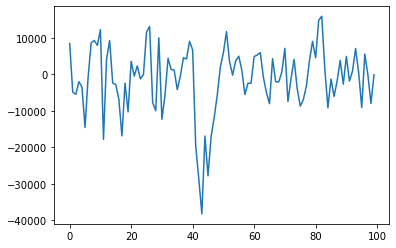

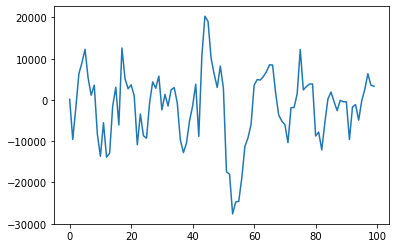

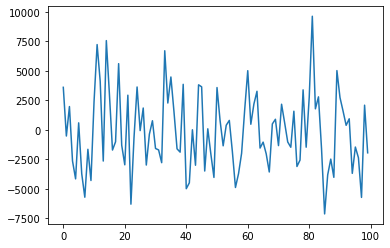

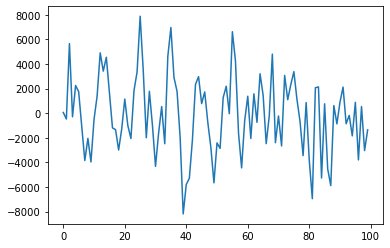

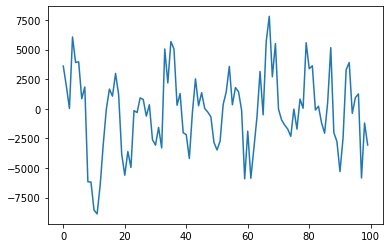

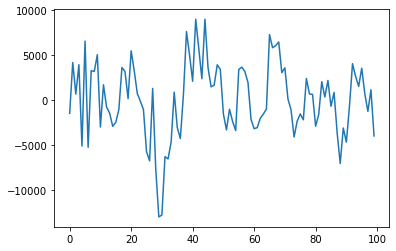

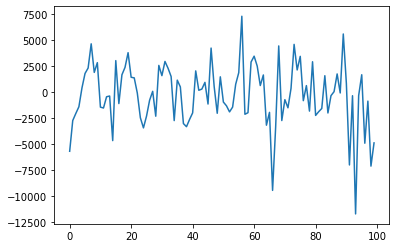

In [27]:
for n in range(1,10):
    plt.plot(pg_loss[n*100 - 100:n*100])
    plt.show()